In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Solution to Exercise 4.9

In [50]:
# Define the data and parameters

def a(t):
    # Left boundary
    return np.exp(t)-2.0

def b(t):
    # Right boundary
    return np.exp(t)+3.0

def f(x):
    # Initial data chosen so that 
    return 1.0+x

def q(x,t):
    return 11*np.exp(t) + 10*x

ell_1 = -2.0
ell_2 = 3.0

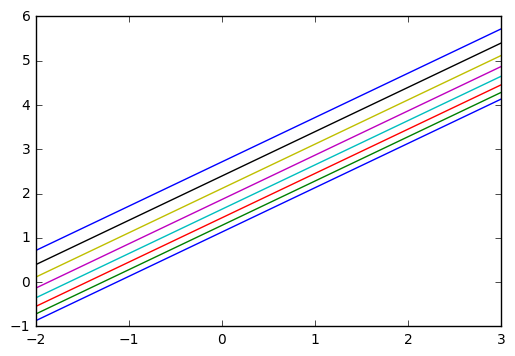

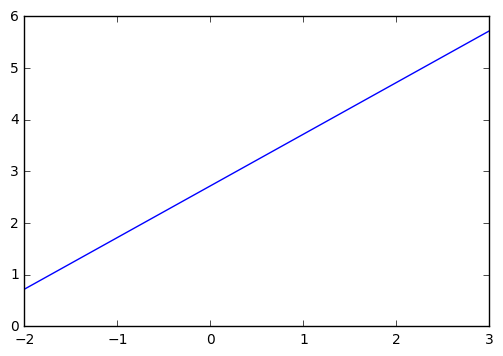

In [60]:
# Define an explicit method

n = 49
x = np.linspace(ell_1,ell_2,n+2) # <----- ell_1 and ell_2 here
dx = x[1]-x[0]

A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)    
A *= 4.0/dx**2 # <------ Note the 4

r = 0.5/4.0
dt = r*dx**2

v = np.copy(f(x))

t = 0

force = np.zeros(n)

B = np.eye(n)-dt*(A+10*np.eye(n)) # <------ Note the +10I

count = 0

while t<1:
    force = dt*q(x[1:-1],t)
    force[0] += dt*4*a(t)/dx**2 # <--------- Note the 4a(t)
    force[-1] += dt*4*b(t)/dx**2 # <-------- Note the 4b(t)
    v[1:-1] = np.dot(B,v[1:-1]) + force 
    t += dt
    v[0] = a(t)
    v[-1] = b(t)
    count += 1
    if count%100 == 0:
        plt.plot(x,v)

plt.figure(2)
plt.plot(x,v)

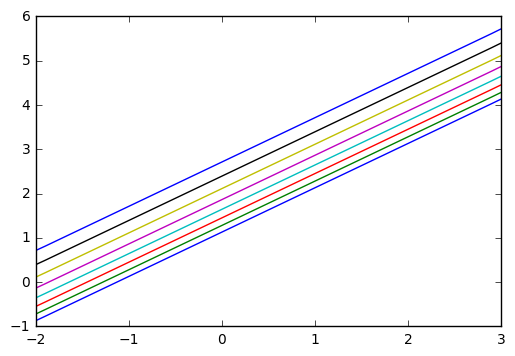

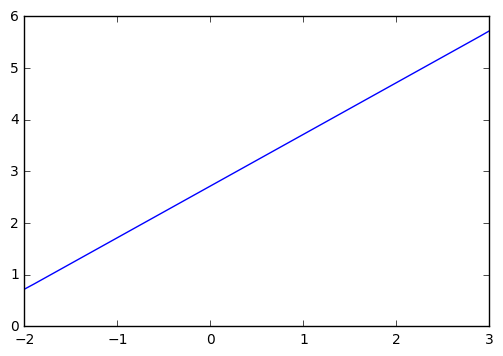

In [61]:
# Define an explicit method

n = 49
x = np.linspace(ell_1,ell_2,n+2) # <----- ell_1 and ell_2 here
dx = x[1]-x[0]

A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)    
A *= 4.0/dx**2 # <------ Note the 4

r = 0.5/4.0
dt = r*dx**2

v = np.copy(f(x))
t = 0

force = np.zeros(n)

B = np.eye(n)+dt*(A+10*np.eye(n)) # <------ Note the +10I
B_inv = np.linalg.inv( B )


count = 0

while t<1:
    force = dt*q(x[1:-1],t)
    force[0] += dt*4*a(t)/dx**2 # <--------- Note the 4a(t)
    force[-1] += dt*4*b(t)/dx**2 # <-------- Note the 4b(t)
    v[1:-1] = np.dot( B_inv, v[1:-1] + force)
    t += dt
    v[0] = a(t)
    v[-1] = b(t)
    count += 1
    if count%100 == 0:
        plt.plot(x,v)

plt.figure(2)        
plt.plot(x,v)